<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Cleaning_Outliers_e_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas


In [ ]:
!pip install sidetable
!pip install pandas.profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

## Outliers

In [ ]:
df,_ = datasets.load_wine(return_X_y = True, as_frame = True)

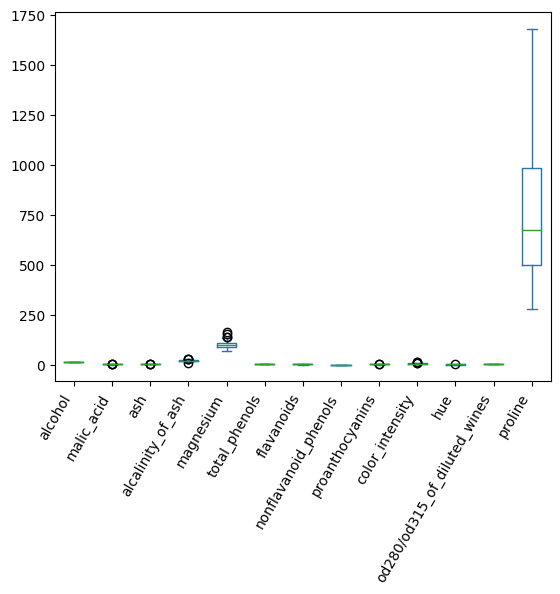

In [ ]:
df.plot.box()
plt.xticks(rotation = 60, ha = 'right');

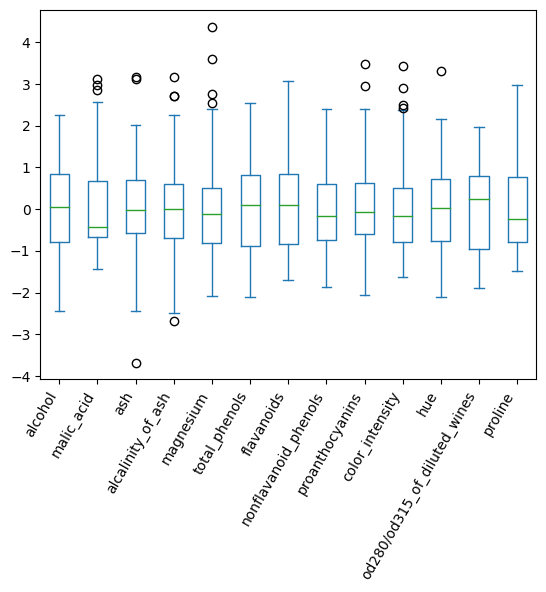

In [ ]:
# Padronizando  os dados
df.apply(scale).plot.box()
plt.xticks(rotation = 60, ha = 'right');

In [ ]:
def is_outlier(array, extreme = False):
  """Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
# mostrando aplicação da função
is_outlier(df.ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [ ]:
# Calculando qtd de outliers
is_outlier(df.ash).sum()

3

In [ ]:
# Mostrando aplicação em todas colunas numéricas contínuas
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

## Removendo

In [ ]:
df[df.apply(is_outlier).any(axis = 1)] # esses são outlier

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


In [ ]:
df[~df.apply(is_outlier).any(axis = 1)] # esses não são

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


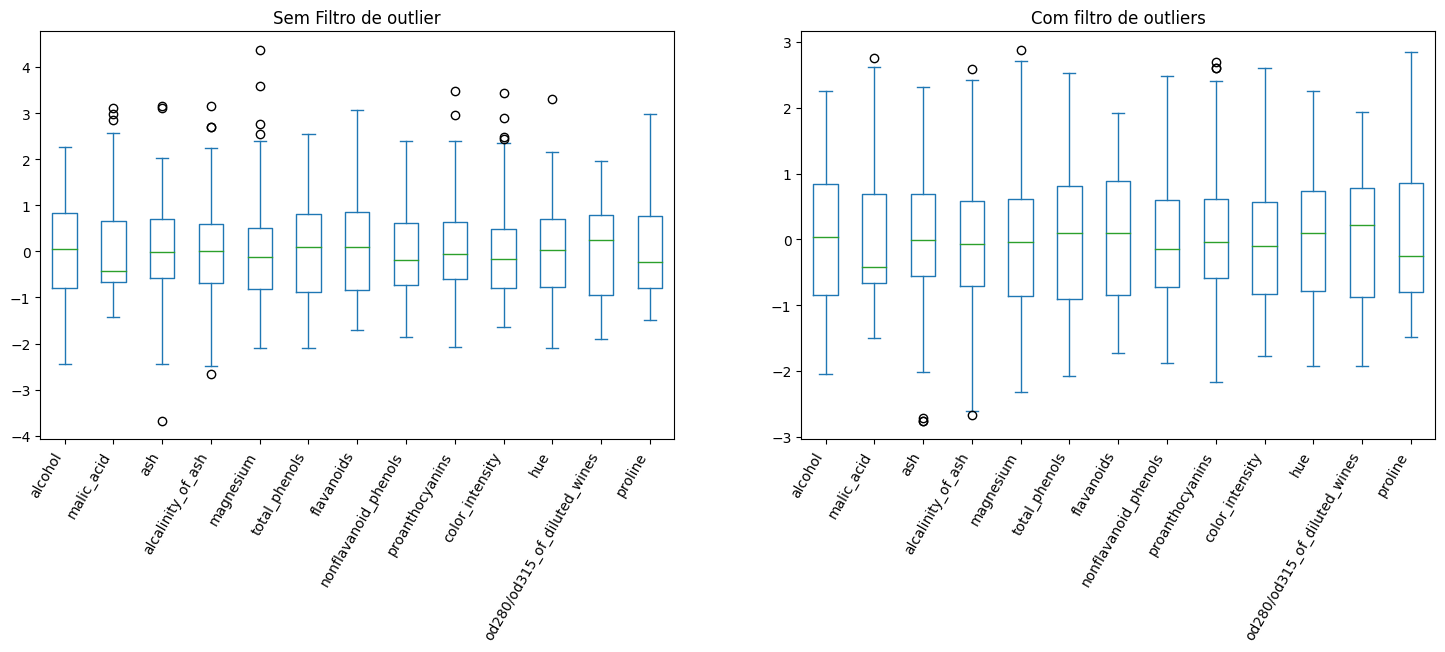

In [ ]:
# Figuras lado a lado com e sem remoção dos outliers

df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols = 2, figsize = (18,6))

df.apply(scale).plot.box(ax=axes[0], title = 'Sem Filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title = 'Com filtro de outliers')

fig.autofmt_xdate(rotation = 60, ha = 'right')
plt.show()


#### Com Z-score

In [ ]:
# Precisa colocar o "corte"
def z_score_outliers(array):
  scaled_array = scale(array)
  return (scaled_array < -3) | (scaled_array > 3)

  df_without_outliers = df[~df.apply(zscore_outlier).any(axis = 1)]

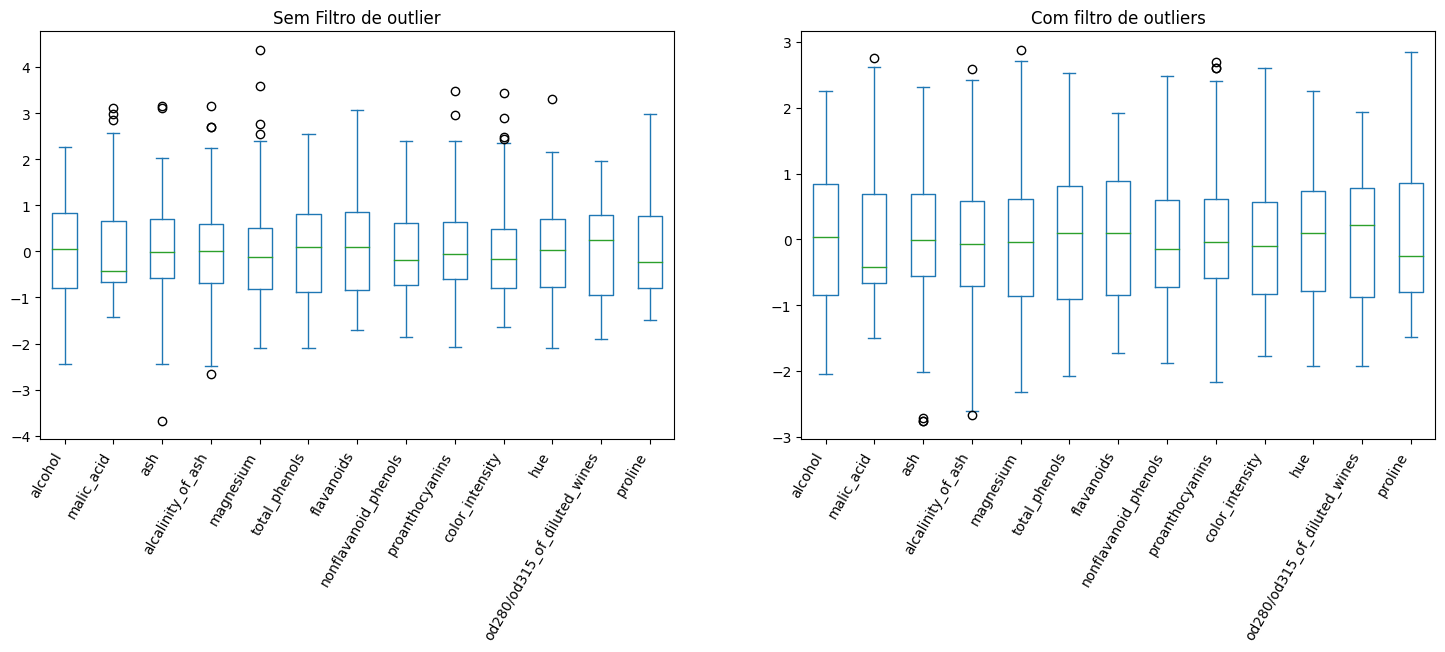

In [ ]:

fig,axes = plt.subplots(ncols = 2, figsize = (18,6))

df.apply(scale).plot.box(ax=axes[0], title = 'Sem Filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title = 'Com filtro de outliers')

fig.autofmt_xdate(rotation = 60, ha = 'right')
plt.show()

## Corrigindo

In [ ]:
# Mostrando Percentis
df.describe(percentiles = [.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [ ]:
def cap_values(array, lower_quantile = 1., upper_quantile = .99): # ajustas o .1 e o .99 conforme a nossa necessidade
  array = array.copy()

  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array < lower_quantile] = lower_quantile
  array[array > upper_quantile] = upper_quantile

  return array

In [ ]:
# Aplicando em tudo
df.apply(cap_values)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
1,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
2,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
3,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
4,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
174,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
175,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36
176,14.4728,5.5422,2.989,28.5,141.76,3.5959,3.7914,0.63,3.0336,11.0185,1.4269,3.843,1522.36


## Transformação

#### Log - mais "fraco"

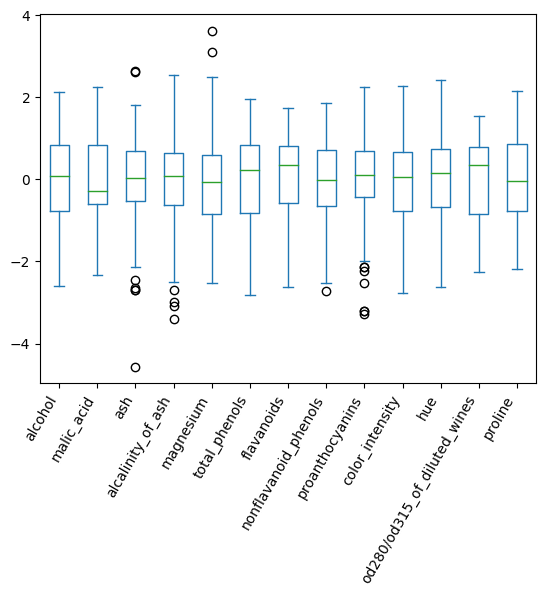

In [ ]:
df.apply(np.log).apply(scale).plot.box()
plt.xticks(rotation = 60, ha = 'right');

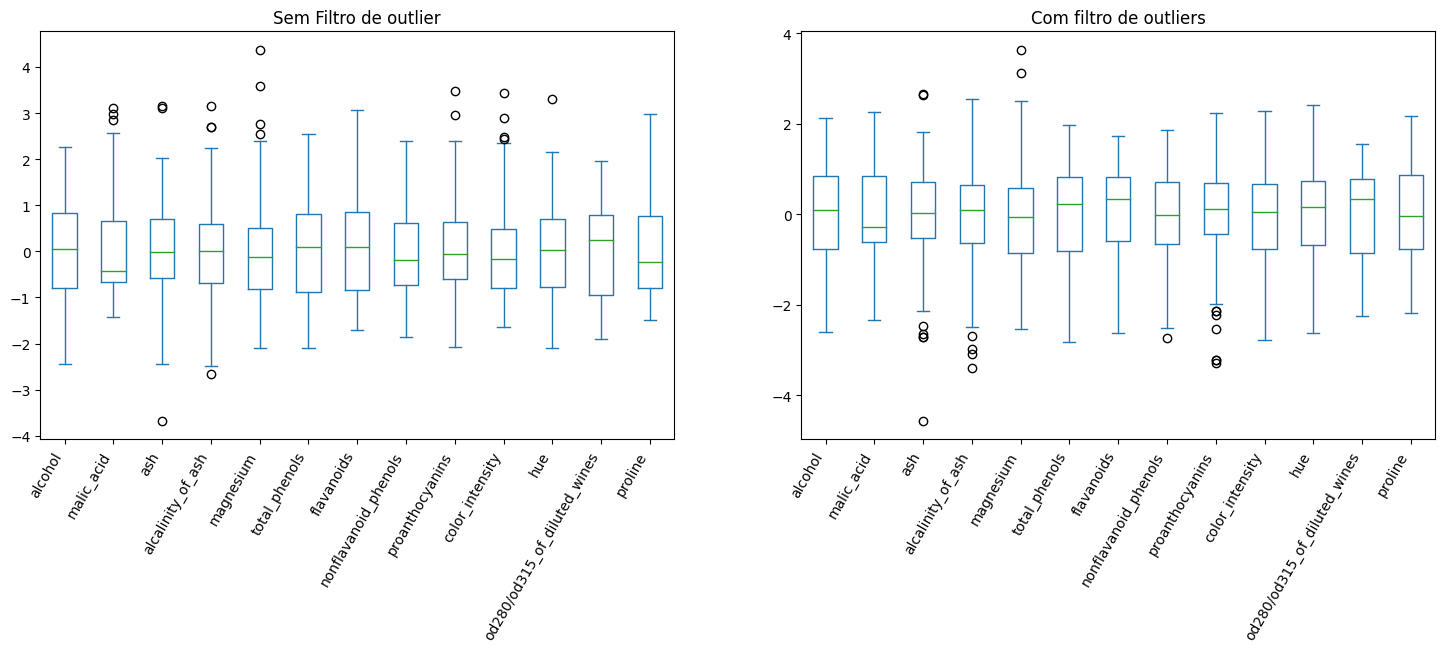

In [ ]:


fig,axes = plt.subplots(ncols = 2, figsize = (18,6))

df.apply(scale).plot.box(ax=axes[0], title = 'Sem Filtro de outlier')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title = 'Com filtro de outliers')

fig.autofmt_xdate(rotation = 60, ha = 'right')
plt.show()

#### Box-cox - sklearn

In [ ]:
# Tenta deixar o mais normal possivel
from sklearn.preprocessing import power_transform

df_boxcox = pd.DataFrame(power_transform(df, method = 'box-cox'), columns = df.columns)

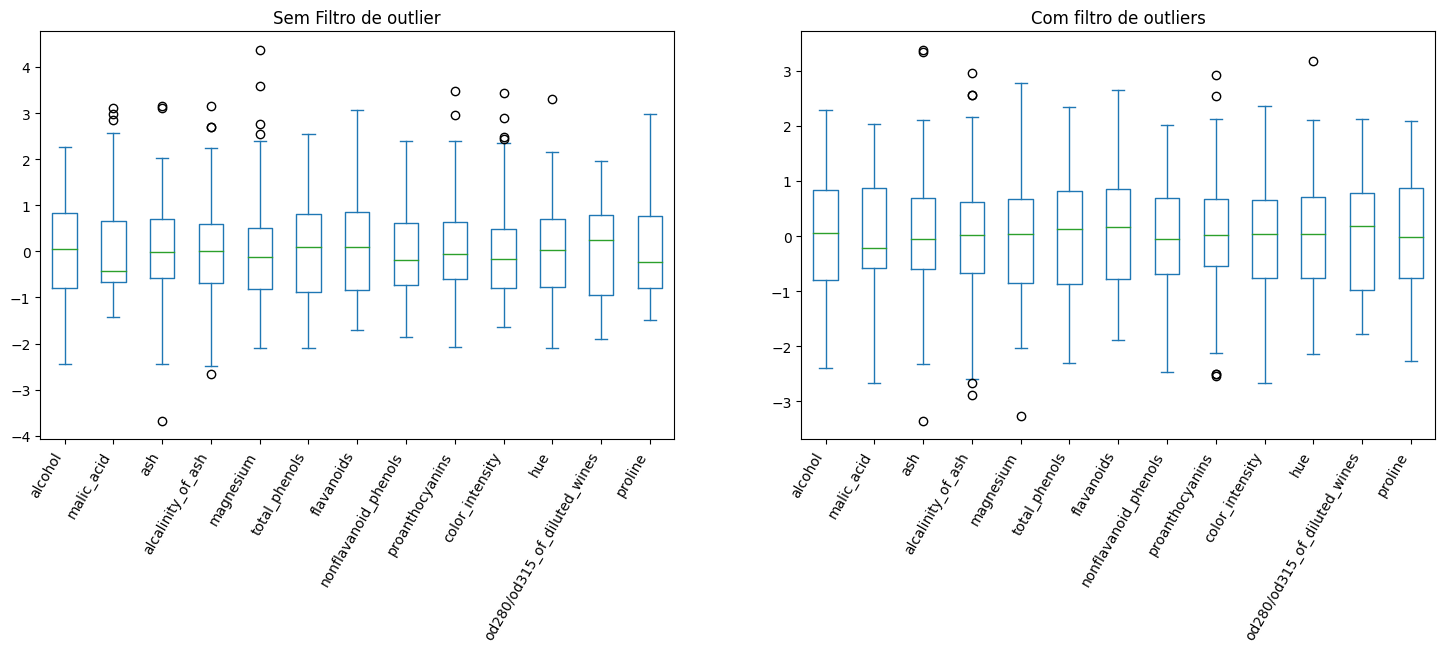

In [ ]:
fig,axes = plt.subplots(ncols = 2, figsize = (18,6))

df.apply(scale).plot.box(ax=axes[0], title = 'Sem Filtro de outlier')
df_boxcox.plot.box(ax=axes[1], title = 'Com filtro de outliers')

fig.autofmt_xdate(rotation = 60, ha = 'right')
plt.show()

## Data

In [ ]:
# pd.to_datetime(df.'coluna')  mudar coluna para formato date (df.Date)
# ou
# df['Coluna'].astype('datetime64[ns'])
# ou
# pd.to_datetime(df['coluna'], format = '%m/%d/%Y')

